# Data Analysis for Customers using Digital Banking

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading

In [2]:
# Loading data for all customers from the CBS
df_all = pd.read_csv('./data_tables/CUSTOMER_LIST.csv')
df_all.head(3)

C:\Users\h.kemibara\AppData\Local\Temp\ipykernel_14456\1087181995.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv('./data_tables/CUSTOMER_LIST.csv')


,Unnamed: 0,BRANCH_NAME,BRANCH_CODE,CUST_AC_NO,CUST_NO,CUSTOMER_TYPE,CCY,ACCOUNT_CLASS,ACCOUNT_DESCRIPTION,AC_STAT_DORMANT,AC_OPEN_DATE,CIF_CREATION_DATE,LCY_CURR_BALANCE
0,0,ROCK CITY,4,4000009868,4079947,I,TZS,PERSSA,PERSONAL SAVINGS ACCOUNT,Y,09/06/2010 00:00,16/11/2018 00:00,0.00
1,1,ROCK CITY,4,4000009879,4079952,C,TZS,SMBECA,SMALL BUSINESSES CURRENT ACCOUNT,N,09/06/2010 00:00,16/11/2018 00:00,9667.26
2,2,ROCK CITY,4,4000009968,4080124,I,TZS,DHAMSA,DHAMIRA SAVINGS ACCOUNT,Y,19/11/2014 00:00,16/11/2018 00:00,1788.90


In [5]:
# loading data for customers registered for Internet Banking
df_internet = pd.read_csv('./data/Internet_Banking_Registration_Report.csv', header=4)
df_internet.head()

,Cif,Branch Code,Branch Name,First Name,Middle Name,Last Name,Mobile Number,Email Id,Intiated By,Unnamed: 9,Auth By,Registered Date,Unnamed: 12,User Type
0,1051066,1.0,MASDO BRANCH,RACHEL,RAYMOS,PHOYA,762143315.0,NaN,SYSTEM,NaN,SYSTEM,37:54.6,NaN,Retail
1,1046513,1.0,MASDO BRANCH,LEONARD,YUDAS,KIJANGWA,716943573.0,NaN,SYSTEM,NaN,SYSTEM,38:29.4,NaN,Retail
2,289763,11.0,TCRA BRANCH,ELIZABETH,JOSEPH,MAKUBATE,683369372.0,lizmakubate@gmail.com,SYSTEM,NaN,SYSTEM,00:00.0,NaN,Retail
3,12103293,29.0,BANDARI,GRACE,NYAKENG'OMBE,MRIBA,689243611.0,NaN,SYSTEM,NaN,SYSTEM,20:33.4,NaN,Retail
4,1049703,1.0,MASDO BRANCH,VERYNICE,GASPER,MUSHI,714511149.0,vmushi@azaniabank.co.tz,SYSTEM,NaN,SYSTEM,44:18.9,NaN,Retail


In [6]:
# Loading data for customers registered for Mobile Banking services
df_mobile = pd.read_csv('./data/Mobile_Banking_Registration_Report.csv', header=4)
df_mobile.head()

,First Name,Middle Name,Last Name,CIF,Mobile Number,Email Id,Unnamed: 6,Branch Name,Branch Code,Unnamed: 9,User Type
0,ADILI,JONASI,SAMBO,14130340.0,655584521.0,NaN,NaN,LUMUMBA BRANCH,24.0,NaN,Retail
1,HASSANI,HASHIMU,MPUNGA,706827.0,758466548.0,NaN,NaN,KATORO BRANCH,13.0,NaN,Retail
2,HASSAN,SAID,MANYANYA,12275793.0,767898419.0,NaN,NaN,MASDO BRANCH,1.0,NaN,Retail
3,LUCIANA,JOAKIM,KIMATI,12600211.0,765711644.0,luciakimati@gmail.com,NaN,MASDO BRANCH,1.0,NaN,Retail
4,ASHURA,KHERI,KATUNZI,13260295.0,654300740.0,NaN,NaN,MASDO BRANCH,1.0,NaN,Retail


### Data Cleaning and transformation

#### Internet Banking  Data

In [7]:
# Removing null rows and column from Internet Banking dataset
df_internet = df_internet.dropna(how='all')
df_internet = df_internet.dropna(axis=1, how='all')
df_internet.head()

,Cif,Branch Code,Branch Name,First Name,Middle Name,Last Name,Mobile Number,Email Id,Intiated By,Auth By,Registered Date,User Type
0,1051066,1.0,MASDO BRANCH,RACHEL,RAYMOS,PHOYA,762143315.0,NaN,SYSTEM,SYSTEM,37:54.6,Retail
1,1046513,1.0,MASDO BRANCH,LEONARD,YUDAS,KIJANGWA,716943573.0,NaN,SYSTEM,SYSTEM,38:29.4,Retail
2,289763,11.0,TCRA BRANCH,ELIZABETH,JOSEPH,MAKUBATE,683369372.0,lizmakubate@gmail.com,SYSTEM,SYSTEM,00:00.0,Retail
3,12103293,29.0,BANDARI,GRACE,NYAKENG'OMBE,MRIBA,689243611.0,NaN,SYSTEM,SYSTEM,20:33.4,Retail
4,1049703,1.0,MASDO BRANCH,VERYNICE,GASPER,MUSHI,714511149.0,vmushi@azaniabank.co.tz,SYSTEM,SYSTEM,44:18.9,Retail


In [8]:
# Dropping the email column
df_internet = df_internet.drop('Email Id', axis=1)
df_internet.head(3)

,Cif,Branch Code,Branch Name,First Name,Middle Name,Last Name,Mobile Number,Intiated By,Auth By,Registered Date,User Type
0,1051066,1.0,MASDO BRANCH,RACHEL,RAYMOS,PHOYA,762143315.0,SYSTEM,SYSTEM,37:54.6,Retail
1,1046513,1.0,MASDO BRANCH,LEONARD,YUDAS,KIJANGWA,716943573.0,SYSTEM,SYSTEM,38:29.4,Retail
2,289763,11.0,TCRA BRANCH,ELIZABETH,JOSEPH,MAKUBATE,683369372.0,SYSTEM,SYSTEM,00:00.0,Retail


In [9]:
##### Convert Cif column to numeric first (in case it's in scientific notation)
df_internet['Cif'] = pd.to_numeric(df_internet['Cif'], errors='coerce')

# Then convert to string with 9-digit formatting, preserving leading zeros
df_internet['Cif'] = df_internet['Cif'].apply(lambda x: f"{int(x):09}" if pd.notnull(x) else None)
df_internet.head(3)

,Cif,Branch Code,Branch Name,First Name,Middle Name,Last Name,Mobile Number,Intiated By,Auth By,Registered Date,User Type
0,001051066,1.0,MASDO BRANCH,RACHEL,RAYMOS,PHOYA,762143315.0,SYSTEM,SYSTEM,37:54.6,Retail
1,001046513,1.0,MASDO BRANCH,LEONARD,YUDAS,KIJANGWA,716943573.0,SYSTEM,SYSTEM,38:29.4,Retail
2,000289763,11.0,TCRA BRANCH,ELIZABETH,JOSEPH,MAKUBATE,683369372.0,SYSTEM,SYSTEM,00:00.0,Retail


In [10]:
# Maintaining branch Code column data format
df_internet['Branch Code'] = df_internet['Branch Code'].apply(
    lambda x: str(int(x)).zfill(3) if pd.notnull(x) else ''
)

In [11]:
# Maintaining Mobile number column data format
df_internet['Mobile Number'] = df_internet['Mobile Number'].apply(
    lambda x: str(int(x)).zfill(10) if pd.notnull(x) else ''
)

In [12]:
## Dropping the last row
df_internet = df_internet.iloc[:-1]

In [13]:
df_internet.tail(3)

,Cif,Branch Code,Branch Name,First Name,Middle Name,Last Name,Mobile Number,Intiated By,Auth By,Registered Date,User Type
6590,014457951,005,TEGETA BRANCH,LILIAN,KASIANO,DONGE,0742421938,S.Mohammed,B.Ubuguyu,04:28.8,Retail
6591,012931352,005,TEGETA BRANCH,JOHN,NICODEMUS,SICILIMA,0713123984,S.Mohammed,B.Ubuguyu,42:20.7,Corporate
6592,000759518,021,KISUTU BRANCH,VANITA,NaN,WADHWANI,0673132000,S.Mohammed,N.Lakhani,46:41.2,Corporate


In [14]:
# Convert 'Registered Date' to datetime
df_internet['Registered Date'] = pd.to_datetime(df_internet['Registered Date'], errors='coerce')

C:\Users\h.kemibara\AppData\Local\Temp\ipykernel_3460\4040196889.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_internet['Registered Date'] = pd.to_datetime(df_internet['Registered Date'], errors='coerce')


In [15]:
# Finding duplicate Cif entries
duplicate_cifs = df_internet[df_internet.duplicated(subset='Cif', keep=False)]

# Show how many duplicate CIFs exist
print(f"Number of duplicate CIFs: {duplicate_cifs['Cif'].nunique()}")

Number of duplicate CIFs: 1129


In [16]:
# Display the actual duplicate rows
duplicate_cifs.sort_values('Cif').head()

,Cif,Branch Code,Branch Name,First Name,Middle Name,Last Name,Mobile Number,Intiated By,Auth By,Registered Date,User Type
31,000192184,019,MOROGORO BRANCH,ABDUL,SWEDI,MWANKEMWA,0787391975,SYSTEM,SYSTEM,2025-05-15,Retail
2484,000192184,018,SOKOINE BRANCH,ABDUL,SWEDI,MWANKEMWA,0787391975,SYSTEM,SYSTEM,2025-05-15,Retail
1718,000193187,016,TUNDUMA BRANCH,WEBSTER,PETER,NDIMBWA,0719008375,SYSTEM,SYSTEM,2025-05-15,Retail
4168,000193187,001,MASDO BRANCH,WEBSTER,PETER,NDIMBWA,0719008375,SYSTEM,SYSTEM,2025-05-15,Retail
4393,000196679,001,MASDO BRANCH,VILDENAUNDA,BENNY,LOSHYA,0766142276,SYSTEM,SYSTEM,NaT,Corporate


In [17]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6593 entries, 0 to 6592
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Cif              6592 non-null   object        
 1   Branch Code      6593 non-null   object        
 2   Branch Name      6589 non-null   object        
 3   First Name       6588 non-null   object        
 4   Middle Name      5228 non-null   object        
 5   Last Name        6588 non-null   object        
 6   Mobile Number    6593 non-null   object        
 7   Intiated By      6593 non-null   object        
 8   Auth By          6576 non-null   object        
 9   Registered Date  3262 non-null   datetime64[ns]
 10  User Type        6593 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usage: 566.7+ KB


#### Mobile Banking Data

In [18]:
df_mobile.head(3)

,First Name,Middle Name,Last Name,CIF,Mobile Number,Email Id,Unnamed: 6,Branch Name,Branch Code,Unnamed: 9,User Type
0,ADILI,JONASI,SAMBO,14130340.0,655584521.0,NaN,NaN,LUMUMBA BRANCH,24.0,NaN,Retail
1,HASSANI,HASHIMU,MPUNGA,706827.0,758466548.0,NaN,NaN,KATORO BRANCH,13.0,NaN,Retail
2,HASSAN,SAID,MANYANYA,12275793.0,767898419.0,NaN,NaN,MASDO BRANCH,1.0,NaN,Retail


In [19]:
## dropping columns and tuples that are fully null
df_mobile = df_mobile.dropna(axis=1, how='all')
## Dropping the last row
df_mobile = df_mobile.iloc[:-1]
df_mobile.tail(3)

,First Name,Middle Name,Last Name,CIF,Mobile Number,Email Id,Branch Name,Branch Code,User Type
9637,ANNASTELLA,MOURICE,LUHENDE,13347300.0,753350037.0,NaN,RWAGASORE BRANCH,17.0,Retail
9638,PASCHAL,NaN,MAGANGA,14298778.0,712385547.0,NaN,MASDO BRANCH,1.0,Retail
9639,NICOLAUS,NaN,BUTILA,14217062.0,755176418.0,nicolausbutila@gmail.com,SOKOINE BRANCH,18.0,Retail


In [20]:
# Convert Cif column to numeric first (in case it's in scientific notation)
df_mobile['CIF'] = pd.to_numeric(df_mobile['CIF'], errors='coerce')

# Then convert to string with 9-digit formatting, preserving leading zeros
df_mobile['CIF'] = df_mobile['CIF'].apply(lambda x: f"{int(x):09}" if pd.notnull(x) else None)
df_mobile.head(3)

,First Name,Middle Name,Last Name,CIF,Mobile Number,Email Id,Branch Name,Branch Code,User Type
0,ADILI,JONASI,SAMBO,014130340,655584521.0,NaN,LUMUMBA BRANCH,24.0,Retail
1,HASSANI,HASHIMU,MPUNGA,000706827,758466548.0,NaN,KATORO BRANCH,13.0,Retail
2,HASSAN,SAID,MANYANYA,012275793,767898419.0,NaN,MASDO BRANCH,1.0,Retail


In [21]:
# Maintaining branch Code column data format
df_mobile['Branch Code'] = df_mobile['Branch Code'].apply(
    lambda x: str(int(x)).zfill(3) if pd.notnull(x) else ''
)

In [22]:
# Maintaining Mobil Numbere column data format
df_mobile['Mobile Number'] = df_mobile['Mobile Number'].apply(
    lambda x: str(int(x)).zfill(10) if pd.notnull(x) else ''
)

In [23]:
df_mobile.head(3)

,First Name,Middle Name,Last Name,CIF,Mobile Number,Email Id,Branch Name,Branch Code,User Type
0,ADILI,JONASI,SAMBO,014130340,0655584521,NaN,LUMUMBA BRANCH,024,Retail
1,HASSANI,HASHIMU,MPUNGA,000706827,0758466548,NaN,KATORO BRANCH,013,Retail
2,HASSAN,SAID,MANYANYA,012275793,0767898419,NaN,MASDO BRANCH,001,Retail


In [24]:
df_mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9640 entries, 0 to 9639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   First Name     9616 non-null   object
 1   Middle Name    6976 non-null   object
 2   Last Name      9616 non-null   object
 3   CIF            9640 non-null   object
 4   Mobile Number  9640 non-null   object
 5   Email Id       3779 non-null   object
 6   Branch Name    9640 non-null   object
 7   Branch Code    9640 non-null   object
 8   User Type      9640 non-null   object
dtypes: object(9)
memory usage: 677.9+ KB


#### All customers data from CBS

In [25]:
# Dropping the unwanted columns
df_all = df_all.drop(df_all.columns[0], axis=1)

In [26]:
# Maintaining branch Code column data format
df_all['BRANCH_CODE'] = df_all['BRANCH_CODE'].apply(
    lambda x: str(int(x)).zfill(3) if pd.notnull(x) else ''
)
df_all.head(3)

,BRANCH_NAME,BRANCH_CODE,CUST_AC_NO,CUST_NO,CUSTOMER_TYPE,CCY,ACCOUNT_CLASS,ACCOUNT_DESCRIPTION,AC_STAT_DORMANT,AC_OPEN_DATE,CIF_CREATION_DATE,LCY_CURR_BALANCE
0,ROCK CITY,004,4.000010e+09,4079947,I,TZS,PERSSA,PERSONAL SAVINGS ACCOUNT,Y,09/06/2010 00:00,16/11/2018 00:00,0.00
1,ROCK CITY,004,4.000010e+09,4079952,C,TZS,SMBECA,SMALL BUSINESSES CURRENT ACCOUNT,N,09/06/2010 00:00,16/11/2018 00:00,9667.26
2,ROCK CITY,004,4.000010e+09,4080124,I,TZS,DHAMSA,DHAMIRA SAVINGS ACCOUNT,Y,19/11/2014 00:00,16/11/2018 00:00,1788.90


In [27]:
# Convert Customer Account Number column to numeric first (in case it's in scientific notation)
df_all['CUST_AC_NO'] = pd.to_numeric(df_all['CUST_AC_NO'], errors='coerce')

# Then convert to string with 9-digit formatting, preserving leading zeros
df_all['CUST_AC_NO'] = df_all['CUST_AC_NO'].apply(lambda x: f"{int(x):012}" if pd.notnull(x) else None)
df_all.head(3)

,BRANCH_NAME,BRANCH_CODE,CUST_AC_NO,CUST_NO,CUSTOMER_TYPE,CCY,ACCOUNT_CLASS,ACCOUNT_DESCRIPTION,AC_STAT_DORMANT,AC_OPEN_DATE,CIF_CREATION_DATE,LCY_CURR_BALANCE
0,ROCK CITY,004,004000009868,4079947,I,TZS,PERSSA,PERSONAL SAVINGS ACCOUNT,Y,09/06/2010 00:00,16/11/2018 00:00,0.00
1,ROCK CITY,004,004000009879,4079952,C,TZS,SMBECA,SMALL BUSINESSES CURRENT ACCOUNT,N,09/06/2010 00:00,16/11/2018 00:00,9667.26
2,ROCK CITY,004,004000009968,4080124,I,TZS,DHAMSA,DHAMIRA SAVINGS ACCOUNT,Y,19/11/2014 00:00,16/11/2018 00:00,1788.90


In [28]:
def search_entry(df, column_name, search_value):
    # Check if column exists
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return pd.DataFrame()
    
    # Filter DataFrame
    result = df[df[column_name] == search_value]
    
    if result.empty:
        print(f"No entries found for {search_value} in column '{column_name}'.")
    return result

In [29]:
matches = search_entry(df_mobile, 'Last Name', 'URASSA')
display(matches)

,First Name,Middle Name,Last Name,CIF,Mobile Number,Email Id,Branch Name,Branch Code,User Type
1321,EMMANUEL,DAMAS,URASSA,001049943,0713337777,edamas83@gmail.com,MASDO BRANCH,001,Retail
1796,SWALEHE,ABDUL-MALICK,URASSA,000889436,0652175517,NaN,MASDO BRANCH,001,Retail
3457,ARTHUR,FREDRICK,URASSA,014127813,0785429029,urassaarthur@gmail.com,KISUTU BRANCH,021,Retail
5189,DAVID,NaN,URASSA,014217139,0747876585,NaN,KAHAMA BRANCH,006,Retail
5539,MASTURA,RASHIDI,URASSA,014210818,0755937863,NaN,NKURUMAH BRANCH,004,Retail
5975,MAUREEN,NaN,URASSA,014144993,0756479901,NaN,NAMANGA BRANCH,031,Retail
7314,ARKADI,MARTIN,URASSA,012567841,0745360191,NaN,MASDO BRANCH,001,Retail
8040,CHRISTIAN,LEONARD,URASSA,014273735,0752782001,NaN,ARUSHA CITY BRANCH,010,Retail
9068,CHRISTIAN,NaN,URASSA,014273735,0752782001,NaN,ARUSHA CITY BRANCH,010,Retail


In [30]:
# Convert Customer Number column to numeric first (in case it's in scientific notation)
df_all['CUST_NO'] = pd.to_numeric(df_all['CUST_NO'], errors='coerce')

# Then convert to string with 9-digit formatting, preserving leading zeros
df_all['CUST_NO'] = df_all['CUST_NO'].apply(lambda x: f"{int(x):09}" if pd.notnull(x) else None)
df_all.head(3)

,BRANCH_NAME,BRANCH_CODE,CUST_AC_NO,CUST_NO,CUSTOMER_TYPE,CCY,ACCOUNT_CLASS,ACCOUNT_DESCRIPTION,AC_STAT_DORMANT,AC_OPEN_DATE,CIF_CREATION_DATE,LCY_CURR_BALANCE
0,ROCK CITY,004,004000009868,004079947,I,TZS,PERSSA,PERSONAL SAVINGS ACCOUNT,Y,09/06/2010 00:00,16/11/2018 00:00,0.00
1,ROCK CITY,004,004000009879,004079952,C,TZS,SMBECA,SMALL BUSINESSES CURRENT ACCOUNT,N,09/06/2010 00:00,16/11/2018 00:00,9667.26
2,ROCK CITY,004,004000009968,004080124,I,TZS,DHAMSA,DHAMIRA SAVINGS ACCOUNT,Y,19/11/2014 00:00,16/11/2018 00:00,1788.90


In [31]:
# Convert Customer Number column to numeric first (in case it's in scientific notation)
df_all['LCY_CURR_BALANCE'] = pd.to_numeric(df_all['LCY_CURR_BALANCE'], errors='coerce')
df_all.head(3)

,BRANCH_NAME,BRANCH_CODE,CUST_AC_NO,CUST_NO,CUSTOMER_TYPE,CCY,ACCOUNT_CLASS,ACCOUNT_DESCRIPTION,AC_STAT_DORMANT,AC_OPEN_DATE,CIF_CREATION_DATE,LCY_CURR_BALANCE
0,ROCK CITY,004,004000009868,004079947,I,TZS,PERSSA,PERSONAL SAVINGS ACCOUNT,Y,09/06/2010 00:00,16/11/2018 00:00,0.00
1,ROCK CITY,004,004000009879,004079952,C,TZS,SMBECA,SMALL BUSINESSES CURRENT ACCOUNT,N,09/06/2010 00:00,16/11/2018 00:00,9667.26
2,ROCK CITY,004,004000009968,004080124,I,TZS,DHAMSA,DHAMIRA SAVINGS ACCOUNT,Y,19/11/2014 00:00,16/11/2018 00:00,1788.90


In [32]:
# Duplicate CIFs (Customer Numbers)
duplicate_cifs = df_all[df_all.duplicated(subset='CUST_NO', keep=False)]

# Show how many duplicate CIFs exist
print(f"Number of duplicate Customers: {duplicate_cifs['CUST_NO'].nunique()}")

Number of duplicate Customers: 56961


In [33]:
duplicate_cifs.head(3)

,BRANCH_NAME,BRANCH_CODE,CUST_AC_NO,CUST_NO,CUSTOMER_TYPE,CCY,ACCOUNT_CLASS,ACCOUNT_DESCRIPTION,AC_STAT_DORMANT,AC_OPEN_DATE,CIF_CREATION_DATE,LCY_CURR_BALANCE
14,SAM NUJOMA BRANCH,008,008000006512,008001635,I,TZS,DHAMSA,DHAMIRA SAVINGS ACCOUNT,N,06/10/2016 00:00,16/11/2018 00:00,3.710046e+06
15,SAM NUJOMA BRANCH,008,008000006501,008001635,I,TZS,PERSSA,PERSONAL SAVINGS ACCOUNT,N,10/06/2013 00:00,16/11/2018 00:00,4.872101e+06
32,KAHAMA BRANCH,006,006000041708,006166263,C,TZS,CORPCA,CORPORATES CURRENT ACCOUNT,N,10/04/2018 00:00,16/11/2018 00:00,-5.580374e+09


In [34]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370922 entries, 0 to 370921
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   BRANCH_NAME          370922 non-null  object 
 1   BRANCH_CODE          370922 non-null  object 
 2   CUST_AC_NO           370922 non-null  object 
 3   CUST_NO              370922 non-null  object 
 4   CUSTOMER_TYPE        370922 non-null  object 
 5   CCY                  370922 non-null  object 
 6   ACCOUNT_CLASS        370922 non-null  object 
 7   ACCOUNT_DESCRIPTION  370922 non-null  object 
 8   AC_STAT_DORMANT      28307 non-null   object 
 9   AC_OPEN_DATE         370922 non-null  object 
 10  CIF_CREATION_DATE    370922 non-null  object 
 11  LCY_CURR_BALANCE     370922 non-null  float64
dtypes: float64(1), object(11)
memory usage: 34.0+ MB


### Analysis and visualizations

In [33]:
# Remove duplicates
df_all = df_all.drop_duplicates(subset='CUST_NO')
df_internet = df_internet.drop_duplicates(subset='Cif')
df_mobile = df_mobile.drop_duplicates(subset='CIF')

In [34]:
# Start with all customers
df_all['internet_user'] = df_all['CUST_NO'].isin(df_internet['Cif']).astype(int)
df_all['mobile_user'] = df_all['CUST_NO'].isin(df_mobile['CIF']).astype(int)

# Digital user = either mobile or internet
df_all['digital_user'] = ((df_all['internet_user'] == 1) | (df_all['mobile_user'] == 1)).astype(int)

In [35]:
total_customers = len(df_all)
internet_users = df_all['internet_user'].sum()
mobile_users = df_all['mobile_user'].sum()
digital_users = df_all['digital_user'].sum()  # Users of either internet or mobile
non_digital_users = total_customers - digital_users  # Not using any digital service

print("📊 Total Customers:", total_customers)
print("🌐 Internet Banking Registered Customers:", internet_users)
print("📱 Mobile Banking Registered Customers:", mobile_users)
print("💻📱 Digital Banking Registered Customers (either IB or MB):", digital_users)
print("📵 Non-Digital Users:", non_digital_users)

📊 Total Customers: 310705
🌐 Internet Banking Registered Customers: 4282
📱 Mobile Banking Registered Customers: 8429
💻📱 Digital Banking Registered Customers (either IB or MB): 11766
📵 Non-Digital Users: 298939


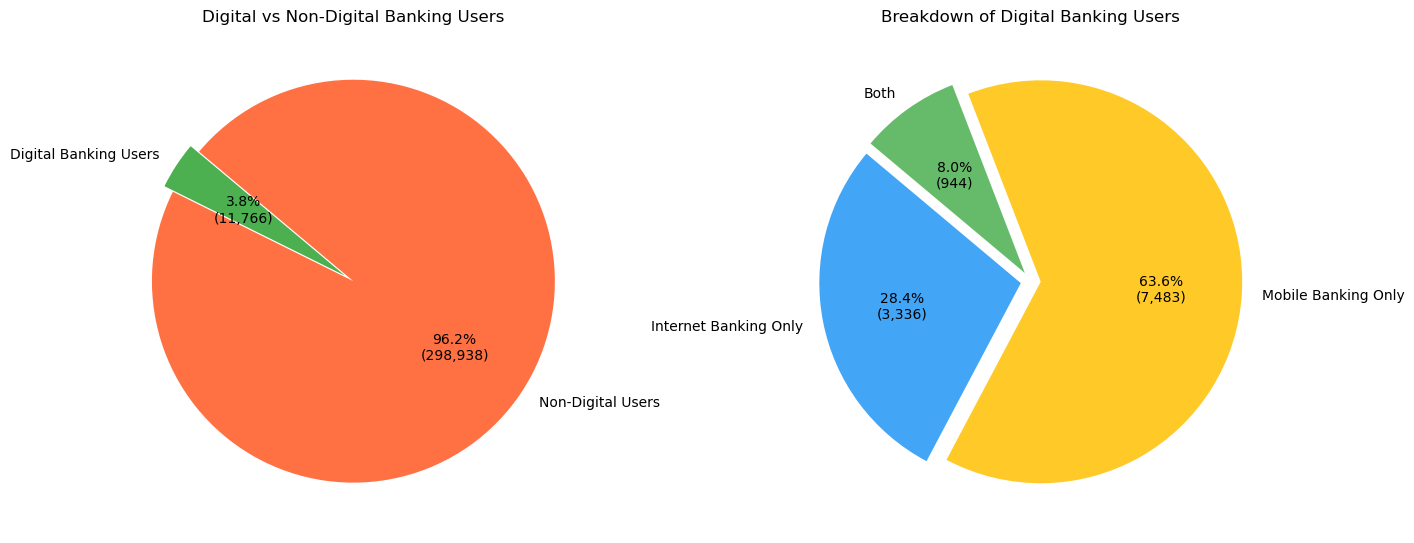

In [36]:
# Breakdown
both = ((df_all['internet_user'] == 1) & (df_all['mobile_user'] == 1)).sum()
only_internet = ((df_all['internet_user'] == 1) & (df_all['mobile_user'] == 0)).sum()
only_mobile = ((df_all['mobile_user'] == 1) & (df_all['internet_user'] == 0)).sum()

# Main counts
total_customers = len(df_all)
digital_users = df_all['digital_user'].sum()
non_digital_users = total_customers - digital_users

# --- Plotting two pie charts ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie Chart 1: Digital vs Non-Digital
labels1 = ['Digital Banking Users', 'Non-Digital Users']
sizes1 = [digital_users, non_digital_users]
colors1 = ['#4CAF50', '#FF7043']
explode1 = (0.05, 0)  # Slightly explode digital

axes[0].pie(
    sizes1, labels=labels1, autopct=lambda p: f'{p:.1f}%\n({int(p * total_customers / 100):,})',
    colors=colors1, startangle=140, explode=explode1
)
axes[0].set_title('Digital vs Non-Digital Banking Users')

# Pie Chart 2: Breakdown of Digital Users
labels2 = ['Internet Banking Only', 'Mobile Banking Only', 'Both']
sizes2 = [only_internet, only_mobile, both]
colors2 = ['#42A5F5', '#FFCA28', '#66BB6A']
explode2 = (0.05, 0.05, 0.05)  # Slightly explode all slices

axes[1].pie(
    sizes2, labels=labels2, autopct=lambda p: f'{p:.1f}%\n({int(p * digital_users / 100):,})',
    colors=colors2, startangle=140, explode=explode2
)
axes[1].set_title('Breakdown of Digital Banking Registrations')

plt.tight_layout()
plt.show()

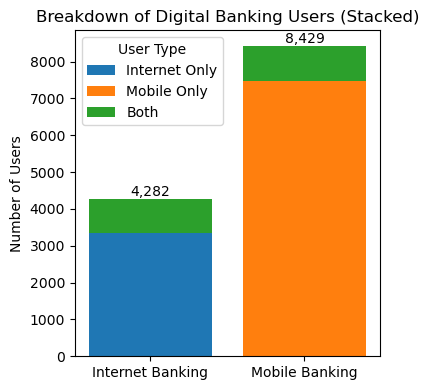

In [37]:
# Counts
both = ((df_all['internet_user'] == 1) & (df_all['mobile_user'] == 1)).sum()
only_internet = ((df_all['internet_user'] == 1) & (df_all['mobile_user'] == 0)).sum()
only_mobile = ((df_all['mobile_user'] == 1) & (df_all['internet_user'] == 0)).sum()

# Totals for labels
total_internet = only_internet + both
total_mobile = only_mobile + both

# Bar positions
labels = ['Internet Banking', 'Mobile Banking']
x = [0, 1]

# Stacked values
internet_vals = [only_internet, 0]
mobile_vals = [0, only_mobile]
both_vals = [both, both]

# Plot
plt.figure(figsize=(4, 4))
bar1 = plt.bar(x, internet_vals, label='Internet Only', color='#1f77b4')
bar2 = plt.bar(x, mobile_vals, bottom=internet_vals, label='Mobile Only', color='#ff7f0e')
bar3 = plt.bar(x, both_vals, bottom=[i+j for i,j in zip(internet_vals, mobile_vals)], label='Both', color='#2ca02c')

# Add annotations for total on top of each bar
totals = [total_internet, total_mobile]
for idx, total in enumerate(totals):
    plt.text(x[idx], total, f'{total:,}', ha='center', va='bottom', fontsize=10)

# Axis setup
plt.xticks(x, labels)
plt.ylabel('Number of Users')
plt.title('Breakdown of Digital Banking Users (Stacked)')
plt.legend(title='User Type')
plt.tight_layout()
plt.show()


C:\Users\h.kemibara\AppData\Local\Temp\ipykernel_10036\2552033820.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=adoption_pct.values, y=adoption_pct.index, palette='viridis')


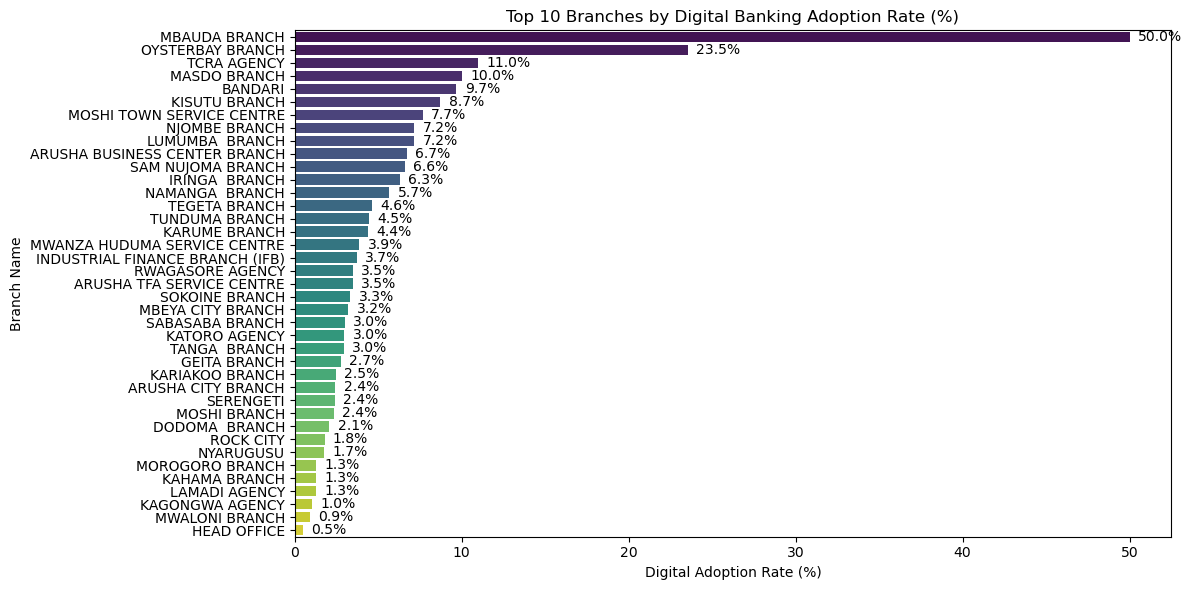

In [38]:
# Total customers per branch
branch_totals = df_all.groupby('BRANCH_NAME').size()

# Digital users per branch
digital_users = df_all.groupby('BRANCH_NAME')['digital_user'].sum()

# Compute adoption percentage
adoption_pct = (digital_users / branch_totals * 100).sort_values(ascending=False)

# Plot horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=adoption_pct.values, y=adoption_pct.index, palette='viridis')

# Labels and title
plt.xlabel('Digital Adoption Rate (%)')
plt.ylabel('Branch Name')
plt.title('Top 10 Branches by Digital Banking Adoption Rate (%)')

# Add value labels on bars
for index, value in enumerate(adoption_pct.values):
    plt.text(value + 0.5, index, f'{value:.1f}%', va='center')

plt.tight_layout()
plt.show()


In [39]:
# Create a set of digital customer IDs from both internet and mobile banking
internet_cifs = set(df_internet['Cif'].astype(str))
mobile_cifs = set(df_mobile['CIF'].astype(str))
digital_cifs = internet_cifs.union(mobile_cifs)

# Tag customers in df_all as digital or not
df_all['IS_DIGITAL'] = df_all['CUST_NO'].astype(str).apply(lambda x: 'Yes' if x in digital_cifs else 'No')

# Group by branch and digital status
branch_summary = df_all.groupby(['BRANCH_NAME', 'IS_DIGITAL'])['CUST_NO'].count().unstack(fill_value=0)

# Calculate total and digital adoption rate
branch_summary['Total'] = branch_summary.sum(axis=1)
branch_summary['Digital Adoption %'] = (branch_summary['Yes'] / branch_summary['Total']) * 100

# Sort by adoption rate
branch_summary_sorted = branch_summary.sort_values(by='Digital Adoption %', ascending=False)

# Display top 10 branches
branch_summary_sorted

IS_DIGITAL,No,Yes,Total,Digital Adoption %
BRANCH_NAME,,,,
MBAUDA BRANCH,1,1,2,50.000000
OYSTERBAY BRANCH,1117,344,1461,23.545517
TCRA AGENCY,7472,920,8392,10.962822
MASDO BRANCH,16711,1859,18570,10.010770
BANDARI,2172,233,2405,9.688150
KISUTU BRANCH,7506,718,8224,8.730545
MOSHI TOWN SERVICE CENTRE,409,34,443,7.674944
NJOMBE BRANCH,634,49,683,7.174231
LUMUMBA BRANCH,5982,461,6443,7.155052
